In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Analisis de Datos

In [2]:
dataset=pd.read_csv('../python-ml-course/datasets/wine/winequality-red.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.shape

(1599, 12)

## Normalizar dataset

In [4]:
dataset_norm=(dataset-dataset.min())/(dataset.max()-dataset.min())
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Crear Cluster Jerarquico con Scipy

### Dendograma Truncado

In [5]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [6]:
clusters2=linkage(dataset_norm,method='ward')

<function matplotlib.pyplot.show(*args, **kw)>

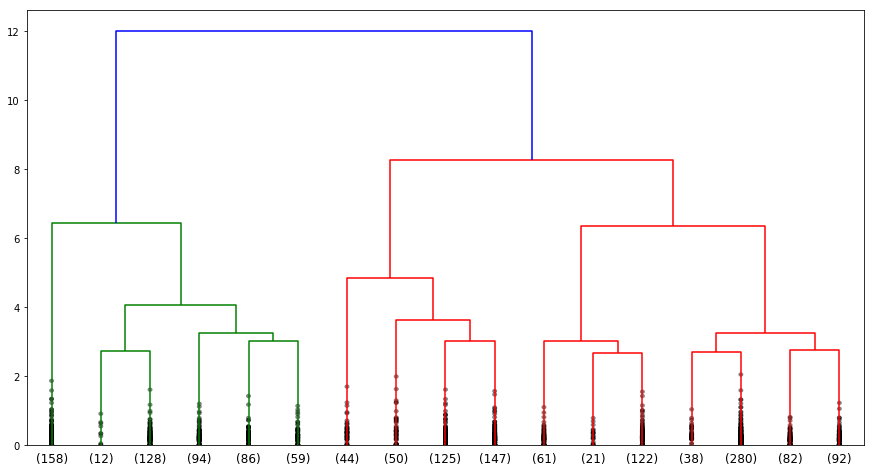

In [24]:
plt.figure(figsize=(15,8))

dendrogram(clusters2,truncate_mode='lastp',p=17,show_contracted=True)

plt.show

## Crear Cluster No Jerarquico (k-means) con Sklearn

In [25]:
from sklearn.cluster import KMeans

0       1
1       1
2       1
3       3
4       1
5       1
6       1
7       5
8       1
9       4
10      1
11      4
12      1
13      2
14      4
15      4
16      0
17      2
18      1
19      3
20      4
21      4
22      2
23      2
24      1
25      1
26      2
27      2
28      1
29      1
       ..
1569    5
1570    0
1571    5
1572    4
1573    5
1574    4
1575    0
1576    0
1577    5
1578    5
1579    5
1580    0
1581    5
1582    5
1583    4
1584    0
1585    0
1586    0
1587    5
1588    5
1589    4
1590    5
1591    5
1592    5
1593    1
1594    1
1595    5
1596    5
1597    1
1598    0
Length: 1599, dtype: int32


Text(0.5,1,'Cluster de Vinos k-means')

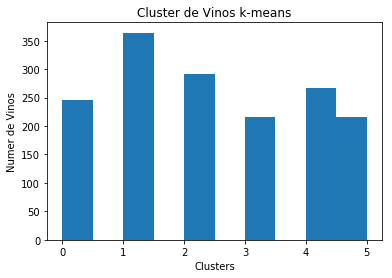

In [26]:
model=KMeans(n_clusters=6)

model.fit(dataset_norm)

clust_k=pd.Series(model.labels_) #model.labels_ == model.predict(dataset_norm)

#print(model.labels_)
#print(model.predict(dataset_norm))
print(clust_k)

plt.hist(clust_k)
plt.xlabel('Clusters')
plt.ylabel('Numer de Vinos')
plt.title('Cluster de Vinos k-means')

In [19]:
dataset_norm['clust_k']=clust_k
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1


In [20]:
model.cluster_centers_ #caracteristicas de los centroides

array([[0.31871665, 0.27605048, 0.30861423, 0.16399877, 0.12828497,
        0.4094266 , 0.31238337, 0.54094001, 0.43000383, 0.19199803,
        0.22032075, 0.45543071],
       [0.23852475, 0.38348638, 0.0685989 , 0.09367944, 0.12080115,
        0.16365501, 0.10522075, 0.48105767, 0.52267024, 0.15364875,
        0.23608763, 0.42967033],
       [0.59176785, 0.20829882, 0.54432558, 0.13899331, 0.17571922,
        0.1480511 , 0.10063276, 0.66313902, 0.31338583, 0.25600891,
        0.28598688, 0.54790698],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.37790489, 0.15696347, 0.43670732, 0.10557969, 0.10683795,
        0.16357495, 0.08302451, 0.41122274, 0.41021702, 0.23944793,
        0.50075047, 0.71056911],
       [0.3309917 , 0.27956268, 0.27714777, 0.08762887, 0.13248886,
        0.13929626, 0.13083919, 0.520722  , 0.41602403, 0.18066959,
        0.20824742,

## Interpretacion Final

In [21]:
dataset_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
clust_k,,,,,,,,,,,,
0,0.318717,0.276050,0.308614,0.163999,0.128285,0.409427,0.312383,0.540940,0.430004,0.191998,0.220321,0.455431
1,0.238525,0.383486,0.068599,0.093679,0.120801,0.163655,0.105221,0.481058,0.522670,0.153649,0.236088,0.429670
2,0.591768,0.208299,0.544326,0.138993,0.175719,0.148051,0.100633,0.663139,0.313386,0.256009,0.285987,0.547907
3,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593
4,0.377905,0.156963,0.436707,0.105580,0.106838,0.163575,0.083025,0.411223,0.410217,0.239448,0.500750,0.710569
5,0.330992,0.279563,0.277148,0.087629,0.132489,0.139296,0.130839,0.520722,0.416024,0.180670,0.208247,0.477663
